In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

plt.rcParams['font.family'] = 'HYGraphic-Medium'

In [3]:
df = {}

for i in range(2010, 2022):
    df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
    df[i].drop(labels=df[i][df[i]['아내지역코드'] > 39].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['남편지역코드'] > 39].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['아내직업코드'] == 99].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['아내결혼코드'] == 9].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['남편결혼코드'] == 9].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['남편교육코드'] == 9].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['아내교육코드'] == 9].index, inplace=True)

mandic = {1:10015,2:5011,3:4833,5:3325.5,6:2582,7:3510,8:3539,9:2494,13:0}
womandic = {1:8024,2:3136,3:3256,5:2119,6:2060,7:2156,8:2795,9:1897,13:0}

for i in range(2010,2021):
    df[i]['남편소득수준'] = df[i]['남편직업코드']
    df[i]['아내소득수준'] = df[i]['아내직업코드']
    
    for j in mandic.keys():
        df[i]['남편소득수준'].replace(j,mandic[j], inplace=True)
        df[i]['아내소득수준'].replace(j,womandic[j], inplace=True)

C:\Users\science7\AppData\Local\Temp\ipykernel_7284\188808977.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
C:\Users\science7\AppData\Local\Temp\ipykernel_7284\188808977.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
C:\Users\science7\AppData\Local\Temp\ipykernel_7284\188808977.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
C:\Users\science7\AppData\Local\Temp\ipykernel_7284\188808977.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")


In [4]:
df[2019].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189178 entries, 0 to 209808
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   신고연도      189178 non-null  int64  
 1   신고월       189178 non-null  int64  
 2   신고일       189178 non-null  int64  
 3   남편지역코드    189178 non-null  int64  
 4   아내지역코드    189178 non-null  int64  
 5   실제결혼연도    189178 non-null  int64  
 6   실제결혼월     189178 non-null  int64  
 7   남편직업코드    189178 non-null  int64  
 8   아내직업코드    189178 non-null  int64  
 9   남편교육코드    189178 non-null  int64  
 10  아내교육코드    189178 non-null  int64  
 11  남편결혼코드    189178 non-null  int64  
 12  아내결혼코드    189178 non-null  int64  
 13  남편연령      189178 non-null  float64
 14  아내연령      189178 non-null  float64
 15  남편국적구분코드  181613 non-null  float64
 16  남편국적코드    766 non-null     object 
 17  아내국적구분코드  181613 non-null  float64
 18  아내국적코드    2169 non-null    object 
 19  남편소득수준    189178 non-null  float64
 20  아내소득

In [5]:
year = 2019
# 소득  (연속)

# 소득 차이 (연속)

# 여성결혼연령 (연속)



# 연상혼
df[year].loc[df[year]['남편연령'] < df[year]['아내연령'], "연상혼 유무"] = 1
df[year].loc[df[year]['남편연령'] >= df[year]['아내연령'], "연상혼 유무"] = 0

# 아내 대도시
df[year].loc[df[year]['아내지역코드'].isin([11, 21, 22, 23, 24, 25]), "아내 대도시 유무"] = 1
df[year].loc[~df[year]['아내지역코드'].isin([11, 21, 22, 23, 24, 25]), "아내 대도시 유무"] = 0

# 남편 대도시
df[year].loc[df[year]['남편지역코드'].isin([11, 21, 22, 23, 24, 25]), "남편 대도시 유무"] = 1
df[year].loc[~df[year]['남편지역코드'].isin([11, 21, 22, 23, 24, 25]), "남편 대도시 유무"] = 0

# 남자 결혼 종류

# 여자 결혼 종류

# 아내 초혼 여부
df[year].loc[df[year]['아내결혼코드'] == 1, "아내 초혼 여부"] = 1
df[year].loc[df[year]['아내결혼코드'] != 1, "아내 초혼 여부"]= 0

# 남편 초혼 여부
df[year].loc[df[year]['남편결혼코드'] == 1, "남편 초혼 여부"] = 1
df[year].loc[df[year]['남편결혼코드'] != 1, "남편 초혼 여부"]= 0

# 결혼 종류 차이 여부
df[year].loc[df[year]['남편 초혼 여부'] == df[year]['아내 초혼 여부'], "결혼종류 차이 유무"] = 1
df[year].loc[df[year]['남편 초혼 여부'] != df[year]['아내 초혼 여부'], "결혼종류 차이 유무"]= 0

# 강혼 유무
df[year].loc[df[year]['아내교육코드'] > df[year]['남편교육코드'], "강혼 유무"] = 1
df[year].loc[~(df[year]['아내교육코드'] > df[year]['남편교육코드']), "강혼 유무"] = 0

# 소득 차
df[year]['소득차'] = df[year]['아내소득수준'] - df[year]['남편소득수준']

df[year]['아내연령제곱'] = df[year]['아내연령'] ** 2
df[year]['남편연령제곱'] = df[year]['남편연령'] ** 2

# 연상혼 유무
df[year].loc[df[year]['아내연령'] > df[year]['남편연령'], "연상혼 여부"] = 1
df[year].loc[df[year]['아내연령'] <= df[year]['남편연령'], "연상혼 여부"] = 0

# 아내 무직 여부
df[year].loc[df[year]['아내직업코드'] == 13, "아내 무직 여부"] = 1
df[year].loc[df[year]['아내직업코드'] != 13, "아내 무직 여부"] = 0

# 남편 무직 여부
df[year].loc[df[year]['남편직업코드'] == 13, "남편 무직 여부"] = 1
df[year].loc[df[year]['남편직업코드'] != 13, "남편 무직 여부"] = 0

df[year].loc[df[year]['남편지역코드'] == df[year]['아내지역코드'], "동일지역 여부"] = 1
df[year].loc[df[year]['남편지역코드'] != df[year]['아내지역코드'], "동일지역 여부"] = 0


In [6]:
df[2019]

,신고연도,신고월,신고일,남편지역코드,아내지역코드,실제결혼연도,실제결혼월,남편직업코드,아내직업코드,남편교육코드,...,남편 초혼 여부,결혼종류 차이 유무,강혼 유무,소득차,아내연령제곱,남편연령제곱,연상혼 여부,아내 무직 여부,남편 무직 여부,동일지역 여부
0,2019,11,19,31,31,2019,11,2,2,5,...,1.0,1.0,0.0,-1875.0,1308.847684,1636.526116,0.0,0.0,0.0,1.0
1,2019,11,19,31,31,2019,11,2,2,5,...,1.0,1.0,0.0,-1875.0,706.496400,1006.348729,0.0,0.0,0.0,1.0
2,2019,11,19,31,31,2019,11,2,2,5,...,1.0,1.0,0.0,-1875.0,863.713321,872.907025,0.0,0.0,0.0,1.0
3,2019,11,22,31,31,2019,11,3,3,5,...,1.0,1.0,0.0,-1577.0,882.981225,1031.887129,0.0,0.0,0.0,1.0
4,2021,4,6,31,31,2019,4,3,3,5,...,1.0,1.0,0.0,-1577.0,842.218441,922.822884,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209804,2019,6,14,21,21,2019,4,2,3,5,...,1.0,1.0,0.0,-1755.0,1074.921796,973.564804,1.0,0.0,0.0,1.0
209805,2019,6,7,23,23,2019,6,5,5,4,...,1.0,1.0,0.0,-1206.5,640.545481,784.560100,0.0,0.0,0.0,1.0
209806,2019,6,14,38,38,2019,6,2,13,5,...,1.0,1.0,0.0,-5011.0,600.838144,897.661521,0.0,1.0,0.0,1.0
209807,2019,6,7,23,23,2019,6,5,2,5,...,1.0,1.0,1.0,-189.5,900.780169,967.956544,0.0,0.0,0.0,1.0


### 연상혼 -> 강혼 

In [7]:
crosstab = pd.crosstab(df[year]['연상혼 유무'], df[year]["강혼 유무"])
c, p, dof, expected = scipy.stats.chi2_contingency(crosstab, correction= True)

print(f"-------------- 2019 연도 연상혼 -> 강혼 카이제곱 검정 -----------------")
print("c-val : " + str(c))
print("P-val : " + str(p))
print("dof : " + str(dof))

-------------- 2019 연도 연상혼 -> 강혼 카이제곱 검정 -----------------
c-val : 467.85434542716405
P-val : 9.390335111137537e-104
dof : 1


### 아내 대도시 -> 강혼

In [8]:
crosstab = pd.crosstab(df[year]["아내 대도시 유무"], df[year]["강혼 유무"])
c, p, dof, expected = scipy.stats.chi2_contingency(crosstab, correction= True)

print(f"-------------- 2019 아내 대도시 -> 강혼 카이제곱 검정 -----------------")
print("c-val : " + str(c))
print("P-val : " + str(p))
print("dof : " + str(dof))

-------------- 2019 아내 대도시 -> 강혼 카이제곱 검정 -----------------
c-val : 8.808577442774842
P-val : 0.0029981770119681065
dof : 1


### 남편 대도시 -> 강혼

In [9]:
crosstab = pd.crosstab(df[year]["남편 대도시 유무"], df[year]["강혼 유무"])
c, p, dof, expected = scipy.stats.chi2_contingency(crosstab, correction= True)

print(f"-------------- 2019 남편 대도시 -> 강혼 카이제곱 검정 -----------------")
print("c-val : " + str(c))
print("P-val : " + str(p))
print("dof : " + str(dof))

-------------- 2019 남편 대도시 -> 강혼 카이제곱 검정 -----------------
c-val : 34.841944818229564
P-val : 3.5758595720117645e-09
dof : 1


### 결혼종류 차이 유무 -> 강혼

In [10]:
crosstab = pd.crosstab(df[year]["결혼종류 차이 유무"], df[year]["강혼 유무"])
c, p, dof, expected = scipy.stats.chi2_contingency(crosstab, correction= True)

print(f"-------------- 2019 결혼종류 차이 유무 -> 강혼 카이제곱 검정 -----------------")
print("c-val : " + str(c))
print("P-val : " + str(p))
print("dof : " + str(dof))

-------------- 2019 결혼종류 차이 유무 -> 강혼 카이제곱 검정 -----------------
c-val : 24.62777233738619
P-val : 6.954225170833803e-07
dof : 1


### 남성 결혼 종류 -> 강혼

In [11]:
crosstab = pd.crosstab(df[year]["남편결혼코드"], df[year]["강혼 유무"])
c, p, dof, expected = scipy.stats.chi2_contingency(crosstab)

print(f"-------------- 2019 남편 결혼 종류 -> 강혼 카이제곱 검정 -----------------")
print("c-val : " + str(c))
print("P-val : " + str(p))
print("dof : " + str(dof))

-------------- 2019 남편 결혼 종류 -> 강혼 카이제곱 검정 -----------------
c-val : 72.12955208530522
P-val : 2.1740362116480226e-16
dof : 2


### 여성 결혼 종류 -> 강혼

In [12]:
crosstab = pd.crosstab(df[year]["아내결혼코드"], df[year]["강혼 유무"])
c, p, dof, expected = scipy.stats.chi2_contingency(crosstab, correction= True)

print(f"-------------- 2019 아내 결혼 종류 -> 강혼 카이제곱 검정 -----------------")
print("c-val : " + str(c))
print("P-val : " + str(p))
print("dof : " + str(dof))

-------------- 2019 아내 결혼 종류 -> 강혼 카이제곱 검정 -----------------
c-val : 145.91925487907343
P-val : 2.0608026364755416e-32
dof : 2


### 여성 연령 -> 강혼

<AxesSubplot:xlabel='강혼 유무', ylabel='아내연령'>

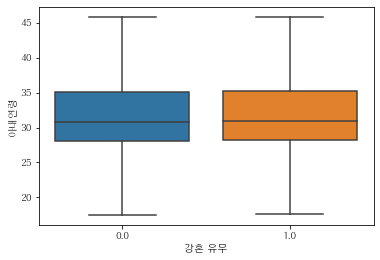

In [13]:
sns.boxplot(x=df[2019]['강혼 유무'], y=df[2019]['아내연령'], showfliers=False)

### 여성 소득 -> 강혼

<AxesSubplot:xlabel='강혼 유무', ylabel='아내소득수준'>

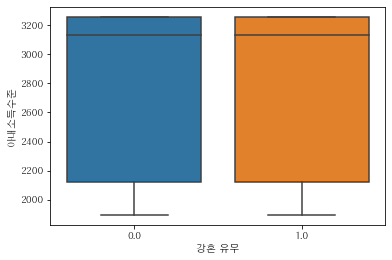

In [14]:
sns.boxplot(x=df[2019]['강혼 유무'], y=df[2019]['아내소득수준'], showfliers=False)

In [15]:
scipy.stats.ttest_ind(df[2019][df[2019]['강혼 유무'] == 1]['아내소득수준'], df[2019][df[2019]['강혼 유무'] == 0]['아내소득수준'], alternative='greater')

Ttest_indResult(statistic=1.0000098281162375, pvalue=0.1586535153708196)

### 여성 소득 차이 -> 강혼

<AxesSubplot:xlabel='강혼 유무', ylabel='아내소득수준'>

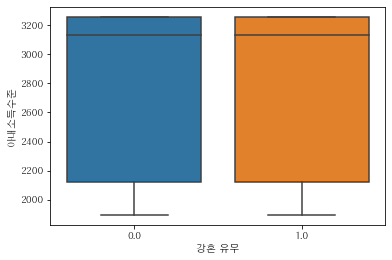

In [16]:
sns.boxplot(x=df[2019]['강혼 유무'], y=df[2019]['아내소득수준'], showfliers=False)

## -------------------------------------------------

In [17]:
df[2019].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189178 entries, 0 to 209808
Data columns (total 35 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   신고연도        189178 non-null  int64  
 1   신고월         189178 non-null  int64  
 2   신고일         189178 non-null  int64  
 3   남편지역코드      189178 non-null  int64  
 4   아내지역코드      189178 non-null  int64  
 5   실제결혼연도      189178 non-null  int64  
 6   실제결혼월       189178 non-null  int64  
 7   남편직업코드      189178 non-null  int64  
 8   아내직업코드      189178 non-null  int64  
 9   남편교육코드      189178 non-null  int64  
 10  아내교육코드      189178 non-null  int64  
 11  남편결혼코드      189178 non-null  int64  
 12  아내결혼코드      189178 non-null  int64  
 13  남편연령        189178 non-null  float64
 14  아내연령        189178 non-null  float64
 15  남편국적구분코드    181613 non-null  float64
 16  남편국적코드      766 non-null     object 
 17  아내국적구분코드    181613 non-null  float64
 18  아내국적코드      2169 non-null    object 
 19  남편

In [18]:
features = df[year][['동일지역 여부','남편 무직 여부','아내 무직 여부','연상혼 여부','아내연령제곱','소득차','결혼종류 차이 유무','아내 초혼 여부','남편 초혼 여부',
'아내 대도시 유무','남편 대도시 유무','남편소득수준','아내소득수준', '아내연령', '남편연령', '남편연령제곱']]
oldmarriage = df[year]['강혼 유무']
scaler = StandardScaler()
features = scaler.fit_transform(features)
model = sm.Logit(oldmarriage,features)
results = model.fit()
print('연상혼으로 로지스틱 회귀분석')
print(results.summary())

         Current function value: 0.690090
         Iterations: 35
연상혼으로 로지스틱 회귀분석


c:\Users\science7\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                  강혼 유무   No. Observations:               189178
Model:                          Logit   Df Residuals:                   189163
Method:                           MLE   Df Model:                           14
Date:                Tue, 09 Aug 2022   Pseudo R-squ.:                 -0.4507
Time:                        15:55:08   Log-Likelihood:            -1.3055e+05
converged:                      False   LL-Null:                       -89988.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0067      0.005      1.452      0.146      -0.002       0.016
x2            -0.0301      0.005     -5.839      0.000      -0.040      -0.020
x3             0.0065      0.008      0.791      0.4

In [19]:
crosstab = pd.crosstab(df[year]['강혼 유무'], df[year]['연상혼 여부'])

<AxesSubplot:xlabel='연상혼 여부', ylabel='강혼 유무'>

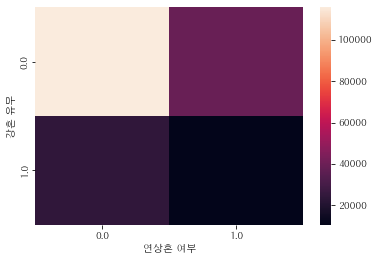

In [21]:
sns.heatmap(data=crosstab)

In [22]:
df[2019]

,신고연도,신고월,신고일,남편지역코드,아내지역코드,실제결혼연도,실제결혼월,남편직업코드,아내직업코드,남편교육코드,...,남편 초혼 여부,결혼종류 차이 유무,강혼 유무,소득차,아내연령제곱,남편연령제곱,연상혼 여부,아내 무직 여부,남편 무직 여부,동일지역 여부
0,2019,11,19,31,31,2019,11,2,2,5,...,1.0,1.0,0.0,-1875.0,1308.847684,1636.526116,0.0,0.0,0.0,1.0
1,2019,11,19,31,31,2019,11,2,2,5,...,1.0,1.0,0.0,-1875.0,706.496400,1006.348729,0.0,0.0,0.0,1.0
2,2019,11,19,31,31,2019,11,2,2,5,...,1.0,1.0,0.0,-1875.0,863.713321,872.907025,0.0,0.0,0.0,1.0
3,2019,11,22,31,31,2019,11,3,3,5,...,1.0,1.0,0.0,-1577.0,882.981225,1031.887129,0.0,0.0,0.0,1.0
4,2021,4,6,31,31,2019,4,3,3,5,...,1.0,1.0,0.0,-1577.0,842.218441,922.822884,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209804,2019,6,14,21,21,2019,4,2,3,5,...,1.0,1.0,0.0,-1755.0,1074.921796,973.564804,1.0,0.0,0.0,1.0
209805,2019,6,7,23,23,2019,6,5,5,4,...,1.0,1.0,0.0,-1206.5,640.545481,784.560100,0.0,0.0,0.0,1.0
209806,2019,6,14,38,38,2019,6,2,13,5,...,1.0,1.0,0.0,-5011.0,600.838144,897.661521,0.0,1.0,0.0,1.0
209807,2019,6,7,23,23,2019,6,5,2,5,...,1.0,1.0,1.0,-189.5,900.780169,967.956544,0.0,0.0,0.0,1.0


### 출생코호트 -> 5년 단위
### 출생연도 기준 코호트 : 출생연도 계산 [실결혼연도 - 연령] -> 연령 올림후 연도에서 빼기

In [25]:
import math

df[year]['아내연령올림'] = df[year]['아내연령'].apply(np.ceil)

df[year]['출생연도'] = df[year]['실제결혼연도'] - df[year]['아내연령올림']


In [26]:
df[2019]

,신고연도,신고월,신고일,남편지역코드,아내지역코드,실제결혼연도,실제결혼월,남편직업코드,아내직업코드,남편교육코드,...,강혼 유무,소득차,아내연령제곱,남편연령제곱,연상혼 여부,아내 무직 여부,남편 무직 여부,동일지역 여부,아내연령올림,출생연도
0,2019,11,19,31,31,2019,11,2,2,5,...,0.0,-1875.0,1308.847684,1636.526116,0.0,0.0,0.0,1.0,37.0,1982.0
1,2019,11,19,31,31,2019,11,2,2,5,...,0.0,-1875.0,706.496400,1006.348729,0.0,0.0,0.0,1.0,27.0,1992.0
2,2019,11,19,31,31,2019,11,2,2,5,...,0.0,-1875.0,863.713321,872.907025,0.0,0.0,0.0,1.0,30.0,1989.0
3,2019,11,22,31,31,2019,11,3,3,5,...,0.0,-1577.0,882.981225,1031.887129,0.0,0.0,0.0,1.0,30.0,1989.0
4,2021,4,6,31,31,2019,4,3,3,5,...,0.0,-1577.0,842.218441,922.822884,0.0,0.0,0.0,1.0,30.0,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209804,2019,6,14,21,21,2019,4,2,3,5,...,0.0,-1755.0,1074.921796,973.564804,1.0,0.0,0.0,1.0,33.0,1986.0
209805,2019,6,7,23,23,2019,6,5,5,4,...,0.0,-1206.5,640.545481,784.560100,0.0,0.0,0.0,1.0,26.0,1993.0
209806,2019,6,14,38,38,2019,6,2,13,5,...,0.0,-5011.0,600.838144,897.661521,0.0,1.0,0.0,1.0,25.0,1994.0
209807,2019,6,7,23,23,2019,6,5,2,5,...,1.0,-189.5,900.780169,967.956544,0.0,0.0,0.0,1.0,31.0,1988.0


In [27]:
df[year]['출생연도'].min()

1931.0

In [28]:
df[year]['출생연도'].max()

2003.0

<AxesSubplot:>

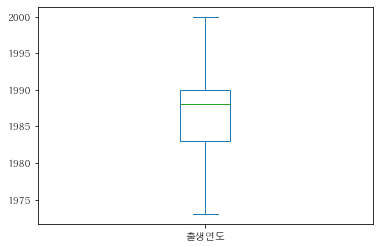

In [31]:
df[year]['출생연도'].plot(kind="box", showfliers=False)

In [40]:
#출생코호트

min = 1970
step = 5
for y in range (1970, 2000, step):
    df[year].loc[df[year]['출생연도'].between(y, y + 5), "코호트"] = f"{y} to {y + 5}" 

In [41]:
df[year]['코호트'].value_counts().sort_index()

1970 to 1975     5979
1975 to 1980     9893
1980 to 1985    27761
1985 to 1990    70284
1990 to 1995    56076
1995 to 2000     6976
2000 to 2005       48
Name: 코호트, dtype: int64